In [1]:
import scipy as sc
from scipy.stats import norm
import glob

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import csv

path =r'/Users/westleykirkham/BoxSync/School/westleya/DataAnalytics/Homework4/Homework4' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)
frame

,DataStructure,Dimensions,KNeighbors,NumPoints,Time(millis),Distribution
0,K,3,1,200,0.039197,U
1,B,3,1,200,0.070020,U
2,K,3,1,200,0.035835,G
3,B,3,1,200,0.057608,G
4,K,3,1,200,0.012117,U
5,B,3,1,200,0.047972,U
6,K,3,1,200,0.036536,G
7,B,3,1,200,0.058140,G
8,K,3,1,200,0.011260,U
9,B,3,1,200,0.047343,U


<function matplotlib.pyplot.show(*args, **kw)>

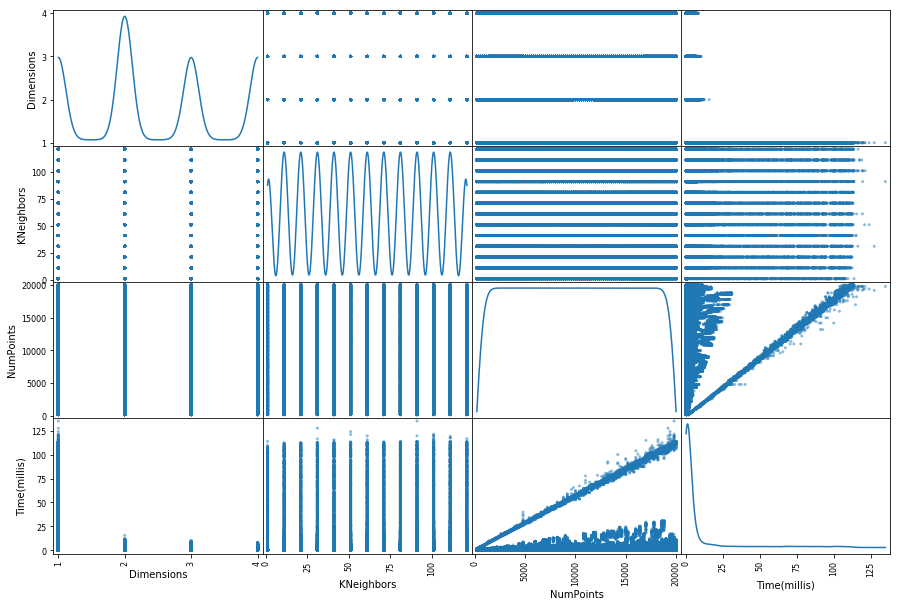

In [2]:
pd.plotting.scatter_matrix(frame, figsize=(15,10), diagonal="kde", vmin=-1, vmax=1)
plt.show

In [3]:
frame.describe()

,Dimensions,KNeighbors,NumPoints,Time(millis)
count,70200.000000,70200.00000,70200.00000,70200.000000
mean,2.444444,61.00000,10100.00000,8.242944
std,1.065748,37.41684,5773.25513,20.728691
min,1.000000,1.00000,200.00000,0.004370
25%,2.000000,31.00000,5150.00000,0.331164
50%,2.000000,61.00000,10100.00000,1.091117
75%,3.000000,91.00000,15050.00000,3.758875
max,4.000000,121.00000,20000.00000,134.983417


In [4]:
#Compare the three structures for dimension = 2 and K = 21
kd_frame = frame[frame.DataStructure == 'K']
kd_frame = kd_frame[kd_frame.Dimensions == 2]
kd_frame = kd_frame[kd_frame.KNeighbors == 21]

bk_frame = frame[frame.DataStructure == 'B']
bk_frame = bk_frame[bk_frame.Dimensions == 2]
bk_frame = bk_frame[bk_frame.KNeighbors == 21]

Qd_frame = frame[frame.DataStructure == 'Q']
Qd_frame = Qd_frame[Qd_frame.Dimensions == 2]
Qd_frame = Qd_frame[Qd_frame.KNeighbors == 21]

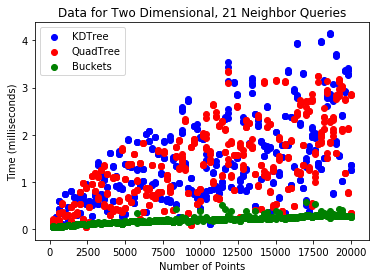

In [5]:

plt.scatter(kd_frame['NumPoints'],kd_frame['Time(millis)'],color='Blue',linewidth=1,label="KDTree")
plt.scatter(Qd_frame['NumPoints'],Qd_frame['Time(millis)'],color='Red',linewidth=1,label="QuadTree")
plt.scatter(bk_frame['NumPoints'],bk_frame['Time(millis)'],color='Green',linewidth=1,label="Buckets")
plt.xlabel('Number of Points'); plt.ylabel('Time (milliseconds)')
plt.legend()
plt.title("Data for Two Dimensional, 21 Neighbor Queries")
plt.show()

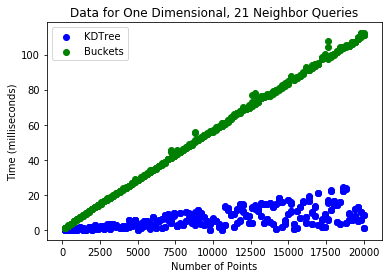

In [6]:
#Compare the three structures for dimension = 1 and K = 21
kd_frame = frame[frame.DataStructure == 'K']
kd_frame = kd_frame[kd_frame.Dimensions == 1]
kd_frame = kd_frame[kd_frame.KNeighbors == 21]

bk_frame = frame[frame.DataStructure == 'B']
bk_frame = bk_frame[bk_frame.Dimensions == 1]
bk_frame = bk_frame[bk_frame.KNeighbors == 21]

plt.scatter(kd_frame['NumPoints'],kd_frame['Time(millis)'],color='Blue',linewidth=1,label="KDTree")
plt.scatter(bk_frame['NumPoints'],bk_frame['Time(millis)'],color='Green',linewidth=1,label="Buckets")
plt.xlabel('Number of Points'); plt.ylabel('Time (milliseconds)')
plt.legend()
plt.title("Data for One Dimensional, 21 Neighbor Queries")
plt.show()

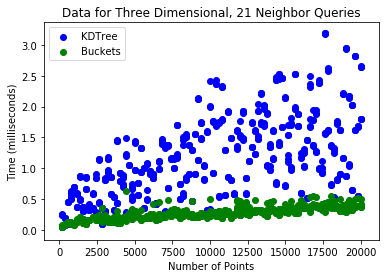

In [7]:
#Compare the three structures for dimension = 3 and K = 21
kd_frame = frame[frame.DataStructure == 'K']
kd_frame = kd_frame[kd_frame.Dimensions == 3]
kd_frame = kd_frame[kd_frame.KNeighbors == 21]

bk_frame = frame[frame.DataStructure == 'B']
bk_frame = bk_frame[bk_frame.Dimensions == 3]
bk_frame = bk_frame[bk_frame.KNeighbors == 21]

plt.scatter(kd_frame['NumPoints'],kd_frame['Time(millis)'],color='Blue',linewidth=1,label="KDTree")
plt.scatter(bk_frame['NumPoints'],bk_frame['Time(millis)'],color='Green',linewidth=1,label="Buckets")
plt.xlabel('Number of Points'); plt.ylabel('Time (milliseconds)')
plt.legend()
plt.title("Data for Three Dimensional, 21 Neighbor Queries")
plt.show()

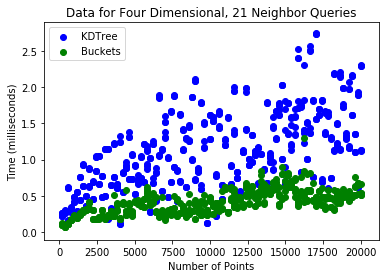

In [8]:
#Compare the three structures for dimension = 3 and K = 21
kd_frame = frame[frame.DataStructure == 'K']
kd_frame = kd_frame[kd_frame.Dimensions == 4]
kd_frame = kd_frame[kd_frame.KNeighbors == 21]

bk_frame = frame[frame.DataStructure == 'B']
bk_frame = bk_frame[bk_frame.Dimensions == 4]
bk_frame = bk_frame[bk_frame.KNeighbors == 21]

plt.scatter(kd_frame['NumPoints'],kd_frame['Time(millis)'],color='Blue',linewidth=1,label="KDTree")
plt.scatter(bk_frame['NumPoints'],bk_frame['Time(millis)'],color='Green',linewidth=1,label="Buckets")
plt.xlabel('Number of Points'); plt.ylabel('Time (milliseconds)')
plt.legend()
plt.title("Data for Four Dimensional, 21 Neighbor Queries")
plt.show()

      From these graphs I gather that Dimension greatly affects the performance of buckets and nominally affects the performance of the KD tree. In 1-D the KD tree performs at its worst: about 5x the search time in any other dimension. For buckets they do abysmally in 1-D, excellent in 2-D and go back to doing terribly once we get up to 4-D. I believe that is the case because the number of divisions in buckets increases exponentially. So, for 1-D you may have 4 divisions for 400 points but in 2-D you'll have 16. As the number of points increase in 4-D, so do the number of divisions and the amount of searching that has to be done before K neighbors can be found. (I set the divisions to sqrt(N * .04)) So, in 4-D, with 20,000 data points that would be sqrt(800) = 28^4, which is about 600,000 buckets. The majority of those would have no points in them and would bog down the search. I think buckets would have performed better if the number of divisions had been set to (N*.04)^(1/Dimensions).
      In all cases the number of points in the data set increased the amount of time it took to perform the query.
      Update: I re-ran the queries with the new equation for determining divisions. The old max run times for Bucket were ~36 ms for 4-D and ~120 ms for 1-D. With the new dataset it's: ~1.6 ms for 4-D and ~135 ms for 1-D. So, a definite performance improvement comes from matching divisions properly to make sure buckets aren't wasted. Where buckets used to do much worse than KD in 4-D it's now outperforming. I don't know what's up with 1-D. (perhaps it's just not meant to be.)

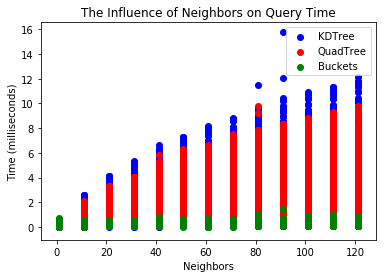

In [9]:
# Test how increasing the number of neighbors changes the query time. 2-D only.
kd_frame = frame[frame.DataStructure == 'K']
kd_frame = kd_frame[kd_frame.Dimensions == 2]
Qd_frame = frame[frame.DataStructure == 'Q']
Qd_frame = Qd_frame[Qd_frame.Dimensions == 2]
bk_frame = frame[frame.DataStructure == 'B']
bk_frame = bk_frame[bk_frame.Dimensions == 2]


plt.scatter(kd_frame['KNeighbors'],kd_frame['Time(millis)'],color='Blue',linewidth=1,label="KDTree")
plt.scatter(Qd_frame['KNeighbors'],Qd_frame['Time(millis)'],color='Red',linewidth=1,label="QuadTree")
plt.scatter(bk_frame['KNeighbors'],bk_frame['Time(millis)'],color='Green',linewidth=1,label="Buckets")
plt.xlabel('Neighbors'); plt.ylabel('Time (milliseconds)')
plt.legend()
plt.title("The Influence of Neighbors on Query Time")
plt.show()

      It looks like the QuadTree did slightly better than KD. Buckets outperformed them both. As with the size of the dataset, the number of requested neighbors directly correlates with the amount of time it takes to complete the search. (except in the case of buckets)
      KD performed the most consistently overall. But, when optimized, and except for the case of 1-D, buckets did the best. I think differentiating between KD and bucket will be relatively easy but Quad vs. KD will be anybody's guess. The data from the 1-D run could also end up being confounding.
      I expected KD to do the best, so I'm surprised to see bucket win. But, once a bucket is found then a decent chunk of the target's neighbors should be found as well. With buckets we're essentially starting at the location of the point and gradually broadening our search. (increasing range queries) With KD and Quad we are traversing the data structure. So long as buckets doesn't have to do many queries (close to the total number of points) to find all the neighbors I believe it'll outperform KD and Quad.

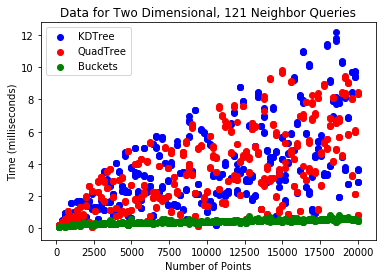

In [10]:
#Compare the three structures for dimension = 2 and K = 21
kd_frame = frame[frame.DataStructure == 'K']
kd_frame = kd_frame[kd_frame.Dimensions == 2]
kd_frame = kd_frame[kd_frame.KNeighbors == 121]

bk_frame = frame[frame.DataStructure == 'B']
bk_frame = bk_frame[bk_frame.Dimensions == 2]
bk_frame = bk_frame[bk_frame.KNeighbors == 121]

Qd_frame = frame[frame.DataStructure == 'Q']
Qd_frame = Qd_frame[Qd_frame.Dimensions == 2]
Qd_frame = Qd_frame[Qd_frame.KNeighbors == 121]

plt.scatter(kd_frame['NumPoints'],kd_frame['Time(millis)'],color='Blue',linewidth=1,label="KDTree")
plt.scatter(Qd_frame['NumPoints'],Qd_frame['Time(millis)'],color='Red',linewidth=1,label="QuadTree")
plt.scatter(bk_frame['NumPoints'],bk_frame['Time(millis)'],color='Green',linewidth=1,label="Buckets")
plt.xlabel('Number of Points'); plt.ylabel('Time (milliseconds)')
plt.legend()
plt.title("Data for Two Dimensional, 121 Neighbor Queries")
plt.show()

In [11]:
# Train a regression to try to predict runtime.
frame = frame.rename(columns={"Time(millis)":"Time"})
queries_NL = sm.ols(formula="Time ~ Dimensions + KNeighbors + NumPoints", data=frame).fit()
queries_NL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     7850.
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        17:33:31   Log-Likelihood:            -3.0227e+05
No. Observations:               70200   AIC:                         6.045e+05
Df Residuals:                   70196   BIC:                         6.046e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.9221      0.234     89.289      0.000      20.463      21.381
Dimensions    -8.8059      0.064   -138.621      0.000      -8.930      -8.681
KNeighbors     0.0188      0.002     10.395      0.000       0.015       0.022
NumPoints      0.0008   1.17e-05     65.004      0.000       0.001       0.001
==============================================================================
Omnibus:                    35296.832   Durbin-Watson:                   2.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           210156.939
Skew:                           2.427   Prob(JB):                         0.00
Kurtosis:                       9.949   Cond. No.                     4.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
#The data structures themselves being influential, this might help.
frame["Struct_classifier"] = frame["DataStructure"].apply(lambda x: 0 if x == 'K' else (1 if x=='B' else 2))
frame

,DataStructure,Dimensions,KNeighbors,NumPoints,Time,Distribution,Struct_classifier
0,K,3,1,200,0.039197,U,0
1,B,3,1,200,0.070020,U,1
2,K,3,1,200,0.035835,G,0
3,B,3,1,200,0.057608,G,1
4,K,3,1,200,0.012117,U,0
5,B,3,1,200,0.047972,U,1
6,K,3,1,200,0.036536,G,0
7,B,3,1,200,0.058140,G,1
8,K,3,1,200,0.011260,U,0
9,B,3,1,200,0.047343,U,1


In [13]:
# Train a regression to try to predict runtime.
queries_NL1 = sm.ols(formula="Time ~ KNeighbors * Dimensions * Struct_classifier + NumPoints * Dimensions", data=frame).fit()
queries_NL1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     5300.
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        17:33:31   Log-Likelihood:            -2.9422e+05
No. Observations:               70200   AIC:                         5.885e+05
Df Residuals:                   70190   BIC:                         5.886e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 -16.1785      0.488    -33.176      0.000     -17.134     -15.223
KNeighbors                                  0.0348      0.006      6.077      0.000       0.024       0.046
Dimensions                                  5.9040      0.183     32.335      0.000       5.546       6.262
KNeighbors:Dimensions                      -0.0038      0.002     -1.762      0.078      -0.008       0.000
Struct_classifier                          26.2756      0.502     52.346      0.000      25.292      27.259
KNeighbors:Struct_classifier               -0.0003      0.007     -0.049      0.961      -0.014       0.013
Dimensions:Struct_classifier              -10.5261      0.209    -50.368      0.000     -10.936     -10.116
KNeighbors:Dimensions:Struct_classifier    -0.0042      0.003     -1.439      0.150      -0.010       0.002
NumPoints                                   0.0029   2.62e-05    110.370      0.000       0.003       0.003
NumPoints:Dimensions                       -0.0009   9.81e-06    -88.622      0.000      -0.001      -0.001
==============================================================================
Omnibus:                    20529.625   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61481.913
Skew:                           1.527   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     3.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Train a regression to try to predict runtime.
# Lets try it without the 1-D data
less_1D = frame[frame.Dimensions != 1]
queries_NL2 = sm.ols(formula="Time ~ NumPoints + KNeighbors + Dimensions + Struct_classifier + Dimensions * Struct_classifier + KNeighbors * NumPoints * Dimensions", data=less_1D).fit()
queries_NL2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     3830.
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        17:33:31   Log-Likelihood:                -91025.
No. Observations:               54600   AIC:                         1.821e+05
Df Residuals:                   54590   BIC:                         1.822e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.6316      0.079     -8.020      0.000      -0.786      -0.477
NumPoints                        4.393e-05   6.49e-06      6.766      0.000    3.12e-05    5.67e-05
KNeighbors                          0.0029      0.001      2.709      0.007       0.001       0.005
Dimensions                          0.4468      0.026     16.936      0.000       0.395       0.498
Struct_classifier                   1.6805      0.028     59.305      0.000       1.625       1.736
Dimensions:Struct_classifier       -0.8891      0.011    -81.532      0.000      -0.910      -0.868
KNeighbors:NumPoints              2.02e-06   9.07e-08     22.263      0.000    1.84e-06     2.2e-06
KNeighbors:Dimensions               0.0007      0.000      2.096      0.036    4.82e-05       0.001
NumPoints:Dimensions            -6.815e-06   2.18e-06     -3.124      0.002   -1.11e-05   -2.54e-06
KNeighbors:NumPoints:Dimensions -3.379e-07   3.05e-08    -11.085      0.000   -3.98e-07   -2.78e-07
==============================================================================
Omnibus:                     9504.054   Durbin-Watson:                   2.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26046.598
Skew:                           0.941   Prob(JB):                         0.00
Kurtosis:                       5.812   Cond. No.                     3.95e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

      Interestingly, without the 1-D I can't seem to do better. I do worse!

{'Intercept': -16.17849958819734, 'KNeighbors': 0.03480399285206513, 'Dimensions': 5.904009150542301, 'KNeighbors:Dimensions': -0.0037753330360694904, 'Struct_classifier': 26.275568708429795, 'KNeighbors:Struct_classifier': -0.00034360322558428004, 'Dimensions:Struct_classifier': -10.526079513060145, 'KNeighbors:Dimensions:Struct_classifier': -0.004203358536656739, 'NumPoints': 0.0028878554454946784, 'NumPoints:Dimensions': -0.000869554624249742}


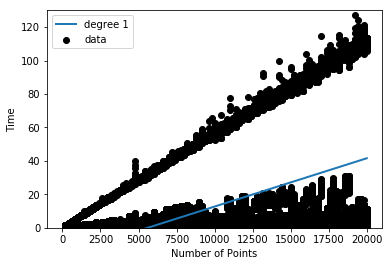

In [15]:
par1 = dict(queries_NL1.params)
print(par1)
plt.scatter(frame["NumPoints"], frame["Time"], color="black", label='data')
x = sc.linspace(0,20000,1000)
y1 = par1['Intercept'] + par1['NumPoints']*x
plt.plot(x,y1,label="degree 1",linewidth=2)

plt.legend()
plt.xlabel('Number of Points'); plt.ylabel('Time')
plt.ylim((0,130))
plt.show()

      Regression by my efforts can't make heads nor tails of all the data together. But, for one data structure, in a particular dimension, I believe it could.

In [16]:
# Train a regression to try to predict runtime.
# Lets try it with just the 1-D data for Buckets
bkframe = frame[frame.DataStructure == 'B']
just_1D = bkframe[bkframe.Dimensions == 1]
queries_NL3 = sm.ols(formula="Time ~ NumPoints", data=just_1D).fit()
queries_NL3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.517e+06
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        17:33:32   Log-Likelihood:                -14348.
No. Observations:                7800   AIC:                         2.870e+04
Df Residuals:                    7798   BIC:                         2.871e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9218      0.035     26.529      0.000       0.854       0.990
NumPoints      0.0056   2.99e-06   1875.486      0.000       0.006       0.006
==============================================================================
Omnibus:                     4754.263   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           338188.096
Skew:                           2.136   Prob(JB):                         0.00
Kurtosis:                      34.974   Cond. No.                     2.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

{'Intercept': 0.9218149179943602, 'NumPoints': 0.005601827158703272}


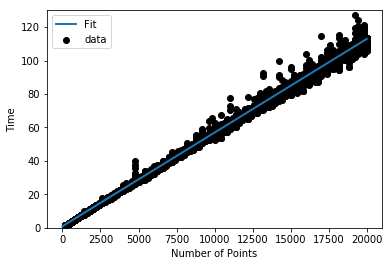

In [17]:
par1 = dict(queries_NL3.params)
print(par1)
plt.scatter(just_1D["NumPoints"], just_1D["Time"], color="black", label='data')
x = sc.linspace(0,20000,1000)
y1 = par1['Intercept'] + par1['NumPoints']*x
plt.plot(x,y1,label="Fit",linewidth=2)

plt.legend()
plt.xlabel('Number of Points'); plt.ylabel('Time')
plt.ylim((0,130))
plt.show()

      This performance holds true for all dimensions for bucket. For KD and Quad regression would be able to produce lines that go through the data and follow the trend reasonably well, but the R^2 wouldn't be anywhere near as good.